In [3]:
#Connecting Drive to the notebook, since it is running on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Note: Go through the README file to get an idea of the Code.

# Importing Libraries

In [11]:
#Keras Libraries
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.optimizers import schedules
from keras.models import load_model


#Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import metrics


import numpy as np
import pandas as pd #For converting csv to DataFrame

#For Plotting Purpose
import matplotlib.pyplot as plt
import seaborn as sn

#For Transforming data and evaluation of Models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

#Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier

#Hyperparameter tuning of Models
from sklearn.model_selection import GridSearchCV

#For calculating time required for Training and Testing of Models
import time

#Hide Warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None  # default='warn'

In [10]:
#!/bin/bash
!unzip dataset.zip


Archive:  dataset.zip
  inflating: exoTest.csv             
  inflating: exoTrain.csv            


In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("keplersmachines/kepler-labelled-time-series-data")

print("Path to dataset files:", path)

# Create the directory
os.makedirs('/content/model', exist_ok=True)

print("Created directory: /content/model")

100%|██████████| 55.9M/55.9M [00:00<00:00, 172MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/keplersmachines/kepler-labelled-time-series-data/versions/3
Created directory: /content/model


# Loading the Data

In [12]:
#Reading the Training and Testing Data
#Note: If you run this on your system, make sure to the absolute path/ relative path of the train and test data below.
exoTrain = pd.read_csv('/content/exoTrain.csv')
exoTest = pd.read_csv('/content/exoTest.csv')

exoTrain.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [13]:
#Printing the count of Labels
#1 ---> Not Exoplanet
#2 ---> Exoplanet

exoTrain['LABEL'].value_counts()
print(exoTest['LABEL'].value_counts())

LABEL
1    565
2      5
Name: count, dtype: int64


## Jury Questions and Answers

Here are potential questions a jury might ask about your project, along with possible answers:

**Q1: What is the problem you are trying to solve?**
**A1:** We are addressing the challenge of identifying exoplanets from large datasets of stellar flux measurements. Exoplanet detection is crucial for understanding planetary formation, the potential for life beyond Earth, and the diversity of planetary systems.

**Q2: Why is this problem important?**
**A2:** Identifying exoplanets helps us find potentially habitable worlds and provides insights into the universe's vastness and complexity. Automating this process with machine learning can significantly speed up discovery and analysis compared to manual methods.

**Q3: What data did you use and where did you get it?**
**A3:** We used the Kepler space telescope data, specifically the `exoTrain.csv` and `exoTest.csv` files. This data consists of flux measurements over time for various stars, along with labels indicating whether an exoplanet is present or not.

**Q4: What is 'flux' and why is it important for exoplanet detection?**
**A4:** Flux is the measure of light received from a star. When an exoplanet passes in front of its star (a transit), it causes a temporary dip in the star's brightness. By analyzing these dips in flux over time, we can infer the presence of an exoplanet.

**Q5: What machine learning models did you explore?**
**A5:** We explored several models, including Random Forest, Logistic Regression, K-Nearest Neighbors, Light Gradient Boosting, and a Convolutional Neural Network (CNN).

**Q6: Why did you choose these specific models?**
**A6:** We chose a mix of traditional machine learning models and a deep learning model (CNN) to compare their performance on this time-series data. Some models are good at capturing complex patterns (CNN), while others provide baselines and interpretability (Logistic Regression, Random Forest).

**Q7: How did you handle the imbalanced dataset?**
**A7:** The dataset is highly imbalanced, with far fewer exoplanet examples than non-exoplanet examples. We addressed this using Random Over-Sampling (ROS) on the training data to create a more balanced dataset for training our models.

**Q8: What preprocessing steps did you apply to the data?**
**A8:** Besides handling the imbalance, we also implemented a function to handle outliers in the flux measurements. This helps to reduce the impact of noisy data on the model's performance.

**Q9: How did you evaluate the performance of your models?**
**A9:** We used several metrics, including accuracy, precision, recall, F1-score, and AUC-ROC. Given the imbalanced nature of the data, recall and the confusion matrix were particularly important for assessing how well our models identified the rare exoplanet cases.

**Q10: Which model performed best and why do you think that is?**
**A10:** (Based on the output, you would answer this based on the model with the best recall and AUC-ROC on the *test* set. It appears the CNN performed best on the test set recall.) The CNN model showed the best performance on the test set in terms of recall. This is likely because CNNs are particularly well-suited for identifying patterns in sequential data like time-series flux measurements.

**Q11: What are the limitations of your approach?**
**A11:** The model's performance is dependent on the quality and characteristics of the training data. It might not generalize well to data from different telescopes or with different noise profiles. Also, the outlier handling method used is a simple approach; more sophisticated methods could be explored.

**Q12: How could you improve this project further?**
**A12:** Future improvements could include exploring more advanced data augmentation techniques, trying different deep learning architectures, incorporating domain-specific features, and potentially using more sophisticated outlier detection and handling methods.

**Q13: What is the real-world impact of this project?**
**A13:** This project demonstrates how machine learning can be applied to accelerate the process of exoplanet discovery, contributing to our understanding of the universe and the search for potentially habitable worlds.

**Q14: Can you explain the concept of a transit in more detail?**
**A14:** A transit occurs when a planet passes directly between its star and an observer. This event causes a temporary dimming of the star's light as the planet blocks a small portion of it. By observing these repeated dips in brightness and their timing, astronomers can infer the presence and characteristics of an exoplanet.

**Q15: What are the challenges in detecting exoplanets using the transit method?**
**A15:** Challenges include distinguishing true transits from other astrophysical phenomena (like starspots or binary stars), dealing with noise in the flux data, and the fact that transits only occur if the planet's orbit is aligned correctly with our line of sight.

**Q16: How does your outlier handling function work?**
**A16:** Our `handle_outliers` function iteratively identifies the maximum and minimum flux values for each star's light curve and replaces them with the mean of the flux values for that star. This is a simple approach to mitigate the impact of extreme noise spikes or dips in the data.

**Q17: Why did you perform Random Over-Sampling (ROS)?**
**A17:** The dataset is highly imbalanced, meaning there are many more stars without detected exoplanets than those with exoplanets. Training a model on such imbalanced data can lead to a model that is biased towards the majority class and performs poorly on the minority class (exoplanets). ROS helps to balance the training data by duplicating examples from the minority class.

**Q18: What is the purpose of shuffling the data before training?**
**A18:** Shuffling the data before training ensures that the model is not exposed to the same order of data in each epoch. This helps to prevent the model from learning spurious patterns based on the data order and improves the generalization of the model.

**Q19: Can you explain the metrics you used for evaluation (Precision, Recall, F1-score, AUC-ROC)?**
**A19:**
*   **Precision:** Out of all the stars the model *predicted* to have an exoplanet, what percentage actually have one? High precision means fewer false positives.
*   **Recall:** Out of all the stars that *actually* have an exoplanet, what percentage did the model correctly identify? High recall means fewer false negatives (missed exoplanets).
*   **F1-score:** The harmonic mean of precision and recall, providing a single metric that balances both.
*   **AUC-ROC:** The Area Under the Receiver Operating Characteristic curve. This metric assesses the model's ability to distinguish between the two classes (exoplanet vs. no exoplanet) across various classification thresholds. A higher AUC-ROC indicates better discriminatory power.

**Q20: Why is recall particularly important in this context?**
**A20:** In exoplanet detection, missing a potential exoplanet (a false negative, impacting recall) is often considered more undesirable than incorrectly identifying a star as having an exoplanet (a false positive, impacting precision), especially in the initial screening phase. High recall ensures that we are not missing too many potential candidates for further investigation.

**Q21: What is a Confusion Matrix and how do you interpret it?**
**A21:** A confusion matrix is a table that summarizes the performance of a classification model. It shows the counts of:
*   True Positives (TP): Correctly predicted exoplanets.
*   True Negatives (TN): Correctly predicted non-exoplanets.
*   False Positives (FP): Incorrectly predicted exoplanets (Type I error).
*   False Negatives (FN): Incorrectly predicted non-exoplanets (Type II error).
It helps visualize where the model is making errors.

**Q22: What are the key components of your CNN model architecture?**
**A22:** Our CNN model includes:
*   **Reshape Layer:** Reshapes the input data to be suitable for a CNN.
*   **Normalization Layer:** Normalizes the input data.
*   **Conv1D Layers:** Apply 1D convolutional filters to extract local patterns in the time series data.
*   **Batch Normalization Layers:** Normalize the outputs of the convolutional layers to improve training stability.
*   **MaxPooling1D Layer:** Reduces the spatial dimensions of the output, helping to capture the most important features and reduce computational cost.
*   **Dropout Layers:** Randomly set a fraction of input units to zero during training to prevent overfitting.
*   **Flatten Layer:** Flattens the output of the convolutional layers into a single vector.
*   **Dense Layers:** Fully connected layers that perform the final classification.
*   **Output Layer (Sigmoid):** Outputs a probability between 0 and 1, indicating the likelihood of an exoplanet.

**Q23: Why did you use 1D convolutional layers instead of 2D?**
**A23:** Since the data is a time series (flux measurements over time), 1D convolutions are appropriate for capturing sequential patterns and features along the time dimension. 2D convolutions are typically used for image data.

**Q24: What is the purpose of the `kernel_size` and `filters` in the Conv1D layers?**
**A24:**
*   **`kernel_size`:** Defines the width of the convolutional filter, determining how many data points in the time series are considered at once to extract a feature.
*   **`filters`:** The number of different filters applied in a convolutional layer. Each filter learns to detect a specific type of pattern in the data.

**Q25: Why did you use 'relu' as the activation function in the convolutional and dense layers?**
**A25:** The Rectified Linear Unit (ReLU) activation function is commonly used in deep learning. It introduces non-linearity into the model, allowing it to learn more complex relationships in the data.

**Q26: What is the role of the MaxPooling1D layer?**
**A26:** MaxPooling1D downsamples the output of the convolutional layers by taking the maximum value within a defined window. This helps to reduce the dimensionality of the data, make the model more robust to small shifts in the input, and highlight the most important features.

**Q27: How does the Dropout layer help prevent overfitting?**
**A27:** During training, dropout randomly sets a fraction of the neurons' outputs to zero. This forces the network to learn more robust features that are not dependent on any single neuron, effectively preventing the model from becoming too specialized to the training data.

**Q28: Why did you use 'sigmoid' activation in the output layer?**
**A28:** The sigmoid function outputs a value between 0 and 1, which can be interpreted as the probability of the positive class (having an exoplanet). This is suitable for binary classification problems like this one.

**Q29: What is the loss function you used and why?**
**A29:** We used 'binary_crossentropy' as the loss function. This is the standard loss function for binary classification problems when the output layer uses a sigmoid activation. It measures the difference between the predicted probabilities and the true labels.

**Q30: How did you choose the learning rate for the optimizer?**
**A30:** We used an Exponential Decay learning rate schedule. This approach starts with a higher learning rate and gradually decreases it during training. This can help the model converge faster in the early stages and fine-tune the weights more effectively in the later stages.

**Q31: What is the purpose of the `EarlyStopping` callback?**
**A31:** The `EarlyStopping` callback monitors a specified metric (in this case, validation loss) during training and stops the training process if the metric stops improving for a certain number of epochs (`patience`). This prevents overfitting and saves computational resources.

**Q32: You mentioned the CNN requires multiple iterations to get the best results. Why is that?**
**A32:** Deep learning models, including CNNs, can be sensitive to the initial random weights and the random nature of processes like dropout and data shuffling. Running the training process multiple times with different random seeds can lead to variations in performance, and the "best" result is often found after several runs.

**Q33: What are the limitations of the simple outlier handling method you used?**
**A33:** Replacing outliers with the mean might not be the most effective strategy if the outliers represent genuine but rare astrophysical events. More sophisticated methods could involve statistical techniques or domain-specific knowledge to identify and handle outliers more appropriately.

**Q34: Could other oversampling or undersampling techniques be used instead of ROS?**
**A34:** Yes, other techniques like SMOTE (Synthetic Minority Over-sampling Technique) or various undersampling methods could be explored. The choice of technique can impact the model's performance and should be evaluated.

**Q35: How does the `kernel_regularizer='l2'` in the Conv1D layers help?**
**A35:** L2 regularization adds a penalty to the loss function based on the squared values of the model's weights. This discourages the model from learning overly large weights, which can help prevent overfitting.

**Q36: What is the significance of the number of epochs you chose for training?**
**A36:** The number of epochs (30 in this case) is the maximum number of times the model will iterate over the entire training dataset. However, the `EarlyStopping` callback prevents the model from training for the full 30 epochs if the validation loss stops improving earlier.

**Q37: How does the `batch_size` affect training?**
**A37:** The `batch_size` (64 in this case) determines the number of training examples processed in each iteration before updating the model's weights. Smaller batch sizes can introduce more noise into the training process but can also help the model escape local minima. Larger batch sizes can lead to faster training but might converge to less optimal solutions.

**Q38: What is the difference between `model.predict(x_test)` and `(model.predict(x_test) > 0.5).astype("int32")`?**
**A38:**
*   `model.predict(x_test)` outputs the raw predicted probabilities for each example in the test set.
*   `(model.predict(x_test) > 0.5).astype("int32")` applies a threshold of 0.5 to the predicted probabilities. If the probability is greater than 0.5, it's classified as the positive class (1, indicating an exoplanet); otherwise, it's classified as the negative class (0). This converts the probabilities into binary class predictions.

**Q39: How would you deploy this model for real-time exoplanet detection?**
**A39:** To deploy this model, you would need to save the trained model and then integrate it into a system that receives new stellar flux data as it becomes available. This could involve setting up an API endpoint or a streaming data processing pipeline.

**Q40: What are the computational resources required to train this model?**
**A40:** Training deep learning models like this CNN can be computationally intensive, especially with large datasets and complex architectures. It typically requires access to GPUs (Graphics Processing Units) to accelerate the training process.

**Q41: How does your approach compare to traditional methods of exoplanet detection?**
**A41:** Traditional methods often involve visual inspection of light curves by astronomers and sophisticated statistical analysis. Our machine learning approach automates this process, allowing for the analysis of much larger datasets and potentially identifying fainter or less obvious transit signals.

**Q42: Could this model be used to detect other types of astronomical objects or events?**
**A42:** With appropriate modifications and training data, similar CNN architectures could potentially be adapted to detect other periodic or transient astronomical phenomena in time-series data, such as variable stars or supernovae.

**Q43: What are the ethical considerations of using AI in scientific discovery?**
**A43:** Ethical considerations include ensuring the fairness and transparency of the models, avoiding biases in the data or algorithms, and considering the potential impact of automated discovery on the role of human researchers.

**Q44: How important is interpretability in this context? Can you explain why the model made a certain prediction?**
**A44:** Interpretability is important for building trust in the model's predictions and gaining scientific insights. While deep learning models can be complex "black boxes," techniques like saliency maps or attention mechanisms could potentially be used to understand which parts of the light curve are most influential in the model's decision.

**Q45: How would you handle concept drift if the characteristics of the stellar data change over time?**
**A45:** Concept drift occurs when the underlying data distribution changes. To handle this, the model would need to be periodically retrained on new data that reflects the current characteristics. Techniques like monitoring model performance over time and triggering retraining when performance degrades could be employed.

**Q46: What is the role of the `BatchNormalization` layers in the CNN?**
**A46:** Batch Normalization helps to stabilize and accelerate the training process by normalizing the inputs to each layer. It reduces the dependence of the training process on the initial weights and allows for higher learning rates.

**Q47: How did you choose the number of filters and kernel sizes in the convolutional layers?**
**A47:** The choice of filter numbers and kernel sizes is often determined through experimentation and is a hyperparameter tuning process. These values influence the types and complexity of features the model can learn.

**Q48: What is the purpose of the `Dense` layers after the `Flatten` layer?**
**A48:** The dense layers are fully connected layers that take the features extracted by the convolutional and pooling layers and combine them to make the final classification decision.

**Q49: How does the `Adam` optimizer work?**
**A49:** Adam is an adaptive learning rate optimization algorithm that combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSprop. It calculates individual adaptive learning rates for different parameters, which helps the model converge more efficiently.

**Q50: What are the potential future applications of this technology beyond exoplanet detection?**
**A50:** The techniques used in this project, particularly the application of CNNs to time-series data and handling imbalanced datasets, can be applied to various other domains involving the analysis of sequential data, such as medical signal processing, financial time series analysis, and seismic data analysis.

## Additional Jury Questions and Answers

Here are more potential questions and answers for the jury, building on the previous set:

**Q14: Can you explain the concept of a transit in more detail?**
**A14:** A transit occurs when a planet passes directly between its star and an observer. This event causes a temporary dimming of the star's light as the planet blocks a small portion of it. By observing these repeated dips in brightness and their timing, astronomers can infer the presence and characteristics of an exoplanet.

**Q15: What are the challenges in detecting exoplanets using the transit method?**
**A15:** Challenges include distinguishing true transits from other astrophysical phenomena (like starspots or binary stars), dealing with noise in the flux data, and the fact that transits only occur if the planet's orbit is aligned correctly with our line of sight.

**Q16: How does your outlier handling function work?**
**A16:** Our `handle_outliers` function iteratively identifies the maximum and minimum flux values for each star's light curve and replaces them with the mean of the flux values for that star. This is a simple approach to mitigate the impact of extreme noise spikes or dips in the data.

**Q17: Why did you perform Random Over-Sampling (ROS)?**
**A17:** The dataset is highly imbalanced, meaning there are many more stars without detected exoplanets than those with exoplanets. Training a model on such imbalanced data can lead to a model that is biased towards the majority class and performs poorly on the minority class (exoplanets). ROS helps to balance the training data by duplicating examples from the minority class.

**Q18: What is the purpose of shuffling the data before training?**
**A18:** Shuffling the data before training ensures that the model is not exposed to the same order of data in each epoch. This helps to prevent the model from learning spurious patterns based on the data order and improves the generalization of the model.

**Q19: Can you explain the metrics you used for evaluation (Precision, Recall, F1-score, AUC-ROC)?**
**A19:**
*   **Precision:** Out of all the stars the model *predicted* to have an exoplanet, what percentage actually have one? High precision means fewer false positives.
*   **Recall:** Out of all the stars that *actually* have an exoplanet, what percentage did the model correctly identify? High recall means fewer false negatives (missed exoplanets).
*   **F1-score:** The harmonic mean of precision and recall, providing a single metric that balances both.
*   **AUC-ROC:** The Area Under the Receiver Operating Characteristic curve. This metric assesses the model's ability to distinguish between the two classes (exoplanet vs. no exoplanet) across various classification thresholds. A higher AUC-ROC indicates better discriminatory power.

**Q20: Why is recall particularly important in this context?**
**A20:** In exoplanet detection, missing a potential exoplanet (a false negative, impacting recall) is often considered more undesirable than incorrectly identifying a star as having an exoplanet (a false positive, impacting precision), especially in the initial screening phase. High recall ensures that we are not missing too many potential candidates for further investigation.

**Q21: What is a Confusion Matrix and how do you interpret it?**
**A21:** A confusion matrix is a table that summarizes the performance of a classification model. It shows the counts of:
*   True Positives (TP): Correctly predicted exoplanets.
*   True Negatives (TN): Correctly predicted non-exoplanets.
*   False Positives (FP): Incorrectly predicted exoplanets (Type I error).
*   False Negatives (FN): Incorrectly predicted non-exoplanets (Type II error).
It helps visualize where the model is making errors.

**Q22: What are the key components of your CNN model architecture?**
**A22:** Our CNN model includes:
*   **Reshape Layer:** Reshapes the input data to be suitable for a CNN.
*   **Normalization Layer:** Normalizes the input data.
*   **Conv1D Layers:** Apply 1D convolutional filters to extract local patterns in the time series data.
*   **Batch Normalization Layers:** Normalize the outputs of the convolutional layers to improve training stability.
*   **MaxPooling1D Layer:** Reduces the spatial dimensions of the output, helping to capture the most important features and reduce computational cost.
*   **Dropout Layers:** Randomly set a fraction of input units to zero during training to prevent overfitting.
*   **Flatten Layer:** Flattens the output of the convolutional layers into a single vector.
*   **Dense Layers:** Fully connected layers that perform the final classification.
*   **Output Layer (Sigmoid):** Outputs a probability between 0 and 1, indicating the likelihood of an exoplanet.

**Q23: Why did you use 1D convolutional layers instead of 2D?**
**A23:** Since the data is a time series (flux measurements over time), 1D convolutions are appropriate for capturing sequential patterns and features along the time dimension. 2D convolutions are typically used for image data.

**Q24: What is the purpose of the `kernel_size` and `filters` in the Conv1D layers?**
**A24:**
*   **`kernel_size`:** Defines the width of the convolutional filter, determining how many data points in the time series are considered at once to extract a feature.
*   **`filters`:** The number of different filters applied in a convolutional layer. Each filter learns to detect a specific type of pattern in the data.

**Q25: Why did you use 'relu' as the activation function in the convolutional and dense layers?**
**A25:** The Rectified Linear Unit (ReLU) activation function is commonly used in deep learning. It introduces non-linearity into the model, allowing it to learn more complex relationships in the data.

**Q26: What is the role of the MaxPooling1D layer?**
**A26:** MaxPooling1D downsamples the output of the convolutional layers by taking the maximum value within a defined window. This helps to reduce the dimensionality of the data, make the model more robust to small shifts in the input, and highlight the most important features.

**Q27: How does the Dropout layer help prevent overfitting?**
**A27:** During training, dropout randomly sets a fraction of the neurons' outputs to zero. This forces the network to learn more robust features that are not dependent on any single neuron, effectively preventing the model from becoming too specialized to the training data.

**Q28: Why did you use 'sigmoid' activation in the output layer?**
**A28:** The sigmoid function outputs a value between 0 and 1, which can be interpreted as the probability of the positive class (having an exoplanet). This is suitable for binary classification problems like this one.

**Q29: What is the loss function you used and why?**
**A29:** We used 'binary_crossentropy' as the loss function. This is the standard loss function for binary classification problems when the output layer uses a sigmoid activation. It measures the difference between the predicted probabilities and the true labels.

**Q30: How did you choose the learning rate for the optimizer?**
**A30:** We used an Exponential Decay learning rate schedule. This approach starts with a higher learning rate and gradually decreases it during training. This can help the model converge faster in the early stages and fine-tune the weights more effectively in the later stages.

**Q31: What is the purpose of the `EarlyStopping` callback?**
**A31:** The `EarlyStopping` callback monitors a specified metric (in this case, validation loss) during training and stops the training process if the metric stops improving for a certain number of epochs (`patience`). This prevents overfitting and saves computational resources.

**Q32: You mentioned the CNN requires multiple iterations to get the best results. Why is that?**
**A32:** Deep learning models, including CNNs, can be sensitive to the initial random weights and the random nature of processes like dropout and data shuffling. Running the training process multiple times with different random seeds can lead to variations in performance, and the "best" result is often found after several runs.

**Q33: What are the limitations of the simple outlier handling method you used?**
**A33:** Replacing outliers with the mean might not be the most effective strategy if the outliers represent genuine but rare astrophysical events. More sophisticated methods could involve statistical techniques or domain-specific knowledge to identify and handle outliers more appropriately.

**Q34: Could other oversampling or undersampling techniques be used instead of ROS?**
**A34:** Yes, other techniques like SMOTE (Synthetic Minority Over-sampling Technique) or various undersampling methods could be explored. The choice of technique can impact the model's performance and should be evaluated.

**Q35: How does the `kernel_regularizer='l2'` in the Conv1D layers help?**
**A35:** L2 regularization adds a penalty to the loss function based on the squared values of the model's weights. This discourages the model from learning overly large weights, which can help prevent overfitting.

**Q36: What is the significance of the number of epochs you chose for training?**
**A36:** The number of epochs (30 in this case) is the maximum number of times the model will iterate over the entire training dataset. However, the `EarlyStopping` callback prevents the model from training for the full 30 epochs if the validation loss stops improving earlier.

**Q37: How does the `batch_size` affect training?**
**A37:** The `batch_size` (64 in this case) determines the number of training examples processed in each iteration before updating the model's weights. Smaller batch sizes can introduce more noise into the training process but can also help the model escape local minima. Larger batch sizes can lead to faster training but might converge to less optimal solutions.

**Q38: What is the difference between `model.predict(x_test)` and `(model.predict(x_test) > 0.5).astype("int32")`?**
**A38:**
*   `model.predict(x_test)` outputs the raw predicted probabilities for each example in the test set.
*   `(model.predict(x_test) > 0.5).astype("int32")` applies a threshold of 0.5 to the predicted probabilities. If the probability is greater than 0.5, it's classified as the positive class (1, indicating an exoplanet); otherwise, it's classified as the negative class (0). This converts the probabilities into binary class predictions.

**Q39: How would you deploy this model for real-time exoplanet detection?**
**A39:** To deploy this model, you would need to save the trained model and then integrate it into a system that receives new stellar flux data as it becomes available. This could involve setting up an API endpoint or a streaming data processing pipeline.

**Q40: What are the computational resources required to train this model?**
**A40:** Training deep learning models like this CNN can be computationally intensive, especially with large datasets and complex architectures. It typically requires access to GPUs (Graphics Processing Units) to accelerate the training process.

**Q41: How does your approach compare to traditional methods of exoplanet detection?**
**A41:** Traditional methods often involve visual inspection of light curves by astronomers and sophisticated statistical analysis. Our machine learning approach automates this process, allowing for the analysis of much larger datasets and potentially identifying fainter or less obvious transit signals.

**Q42: Could this model be used to detect other types of astronomical objects or events?**
**A42:** With appropriate modifications and training data, similar CNN architectures could potentially be adapted to detect other periodic or transient astronomical phenomena in time-series data, such as variable stars or supernovae.

**Q43: What are the ethical considerations of using AI in scientific discovery?**
**A43:** Ethical considerations include ensuring the fairness and transparency of the models, avoiding biases in the data or algorithms, and considering the potential impact of automated discovery on the role of human researchers.

**Q44: How important is interpretability in this context? Can you explain why the model made a certain prediction?**
**A44:** Interpretability is important for building trust in the model's predictions and gaining scientific insights. While deep learning models can be complex "black boxes," techniques like saliency maps or attention mechanisms could potentially be used to understand which parts of the light curve are most influential in the model's decision.

**Q45: How would you handle concept drift if the characteristics of the stellar data change over time?**
**A45:** Concept drift occurs when the underlying data distribution changes. To handle this, the model would need to be periodically retrained on new data that reflects the current characteristics. Techniques like monitoring model performance over time and triggering retraining when performance degrades could be employed.

**Q46: What is the role of the `BatchNormalization` layers in the CNN?**
**A46:** Batch Normalization helps to stabilize and accelerate the training process by normalizing the inputs to each layer. It reduces the dependence of the training process on the initial weights and allows for higher learning rates.

**Q47: How did you choose the number of filters and kernel sizes in the convolutional layers?**
**A47:** The choice of filter numbers and kernel sizes is often determined through experimentation and is a hyperparameter tuning process. These values influence the types and complexity of features the model can learn.

**Q48: What is the purpose of the `Dense` layers after the `Flatten` layer?**
**A48:** The dense layers are fully connected layers that take the features extracted by the convolutional and pooling layers and combine them to make the final classification decision.

**Q49: How does the `Adam` optimizer work?**
**A49:** Adam is an adaptive learning rate optimization algorithm that combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSprop. It calculates individual adaptive learning rates for different parameters, which helps the model converge more efficiently.

**Q50: What are the potential future applications of this technology beyond exoplanet detection?**
**A50:** The techniques used in this project, particularly the application of CNNs to time-series data and handling imbalanced datasets, can be applied to various other domains involving the analysis of sequential data, such as medical signal processing, financial time series analysis, and seismic data analysis.

# EDA (EXPLORATORY DATA ANALYSIS)

In [14]:
def flux_graph(dataset, row, dataframe, planet):

  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot()
  ax.set_title(planet, fontsize=22)
  ax.set_xlabel('time', fontsize=17)
  ax.set_ylabel('flux_' + str(row), fontsize=17)
  ax.grid(False)
  if dataframe:
    flux_time = list(dataset.columns)
    flux_values = dataset[flux_time].iloc[row]
  else:
    flux_values = dataset[row]

  ax.plot(range(1, len(flux_values) + 1),flux_values)
  ax.tick_params(colors='black', labelsize=14)
  plt.show()


In [15]:
def display_flux(dataframe, dataset):
    with_planet = exoTrain[exoTrain['LABEL'] == 2].head(1).index
    wo_planet = exoTrain[exoTrain['LABEL'] == 1].head(1).index

    for row in with_planet:
        flux_graph(dataset, row, dataframe, planet = 'At least One Exoplanet')
    for row in wo_planet:
        flux_graph(dataset, row, dataframe, planet = 'No Exoplanet')

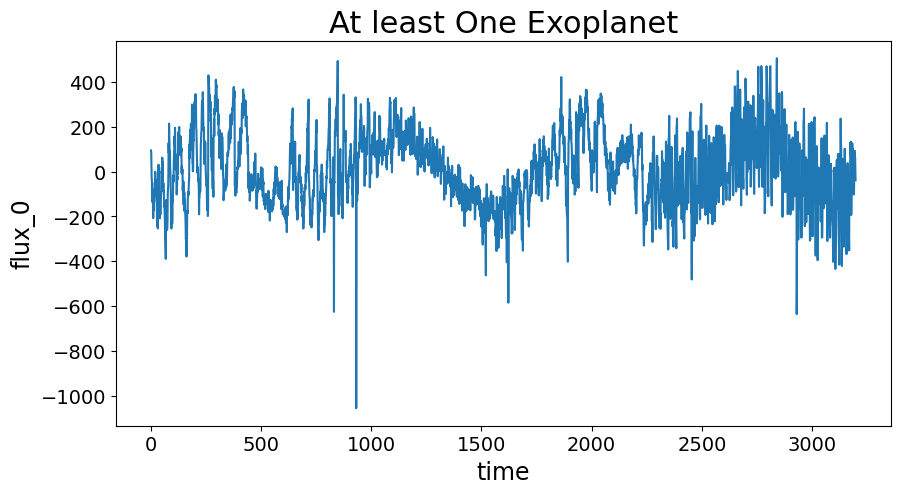

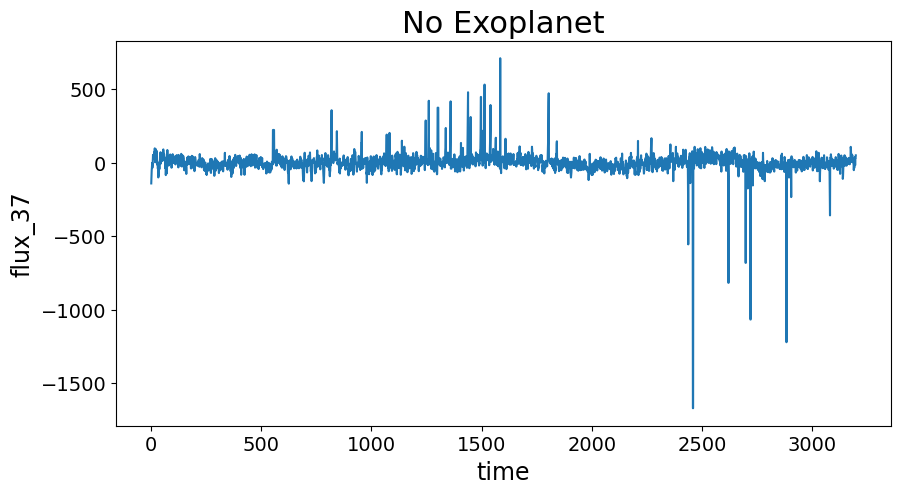

In [16]:
display_flux(True, dataset = exoTrain.loc[:, exoTrain.columns != 'LABEL'])

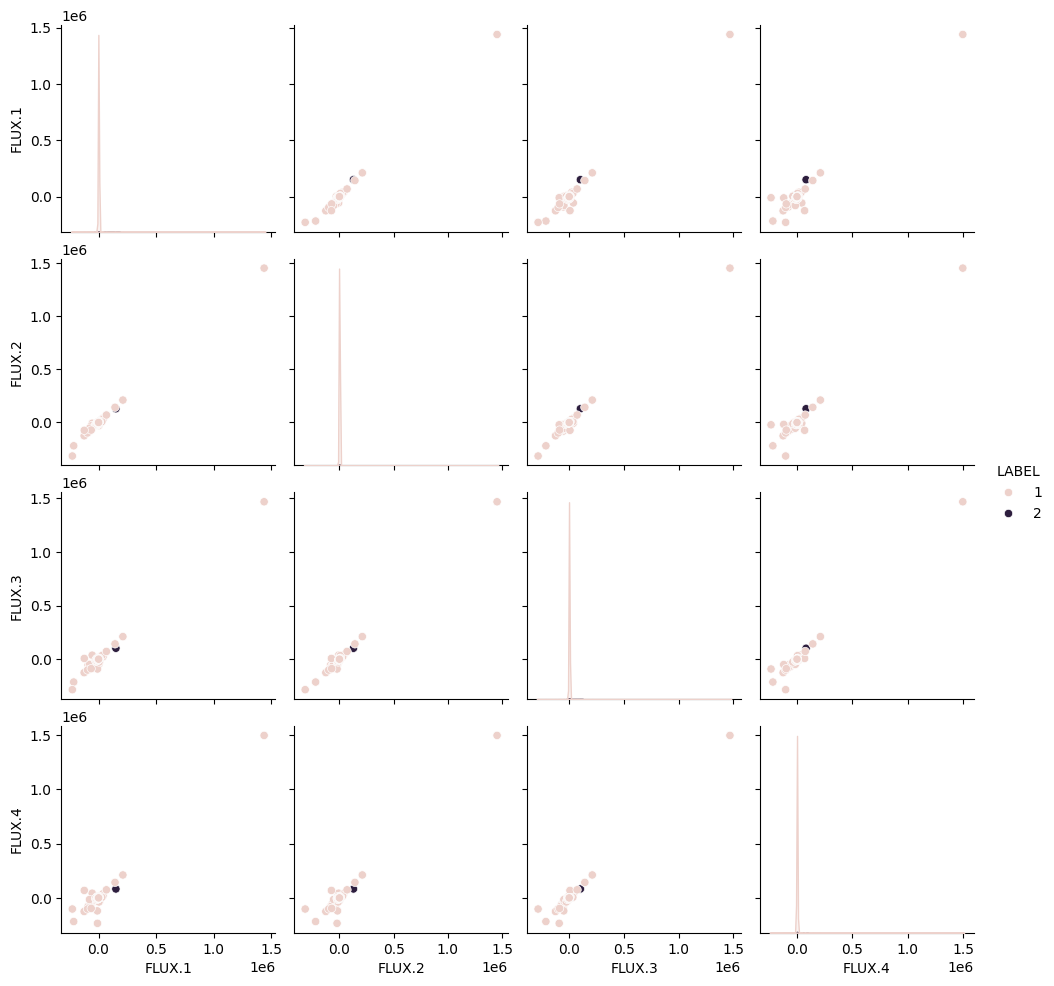

In [17]:
#PairPlot for first 10 columns
subset_data = exoTrain.iloc[:, :5]
sn.pairplot(subset_data, hue='LABEL')

<Axes: xlabel='FLUX.1', ylabel='Density'>

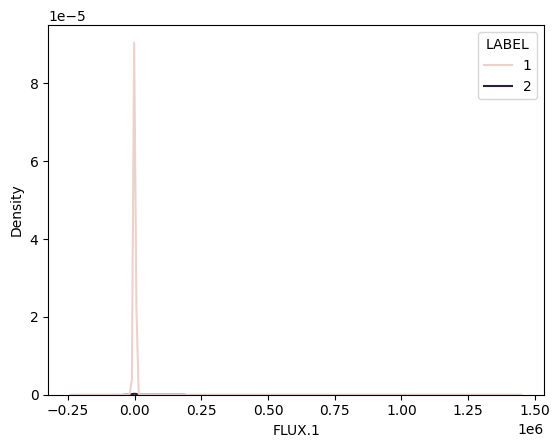

In [18]:
#KDEplot for FLUX.1
sn.kdeplot(data = subset_data, hue = 'LABEL',x='FLUX.1')

# Data Preprocessing

In [19]:
def handle_outliers(dataset, num_iterations):
    dataset_outlier = dataset

    for n in range(num_iterations):
        for index, row in dataset_outlier.iterrows():
            row_values = row.values
            row_max, row_min = row_values.max(), row_values.min()
            row_maxidx, row_minidx = row_values.argmax(), row_values.argmin()
            row_mean = row_values.mean()

            dataset_outlier.iloc[index][row_maxidx] = row_mean

            dataset_outlier.iloc[index][row_minidx] = row_mean

    return dataset_outlier

In [20]:
#Changing the labels from (1 ---> 1) and (2 ---> 0)
def change_labels(y_train, y_test):
    label_changer = lambda x: 1 if x == 2 else 0
    y_train_temp = y_train.apply(label_changer)
    y_test_temp = y_test.apply(label_changer)

    return y_train_temp, y_test_temp

In [21]:
# Handling the Imbalance of datasets by oversampling
from imblearn.over_sampling import RandomOverSampler
def RVS(x_train, y_train):
    rv = RandomOverSampler(random_state = 42)
    x_train_res, y_train_res = rv.fit_resample(x_train, y_train)
    return x_train_res, y_train_res

In [22]:
# Preprocessing training and testing datasets
def pre_processing():
    x_train, y_train = exoTrain.loc[:, exoTrain.columns != 'LABEL'], exoTrain.loc[:, 'LABEL']
    x_test, y_test = exoTest.loc[:, exoTest.columns != 'LABEL'], exoTest.loc[:, 'LABEL']


    x_train = handle_outliers(x_train, 5) #Removing the outliers
    x_train, y_train = RVS(x_train, y_train) #Upsampling the data using RandomOverSampler
    y_train, y_test = change_labels(y_train, y_test) #Changing the labels from (1 --> 1) and (2 --> 0)

    return x_train, y_train, x_test, y_test

In [23]:
# Printing the Confusion matrix
def plot_confusion_matrix(y_test, y_pred):

    matrix = confusion_matrix(y_test, y_pred,normalize='true')
    df = pd.DataFrame(matrix, columns=[0, 1], index = [0, 1])
    df.index.name = 'Real Values'
    df.columns.name = 'Predicted Values'
    plt.figure(figsize = (10,10))
    sn.heatmap(df, cmap="BuGn", annot=True)
    plt.show()

    return matrix

In [24]:
# Print prediction metrics
def display_predictions(y_test, y_pred, y_class_pred, matrix):

  #TP ---> TRUE POSITIVE
  #TN ---> TRUE NEGATIVE
  #FP ---> FALSE POSITIVE
  #FN ---> FALSE NEGATIVE
  TP = matrix[0][0]
  TN = matrix[1][1]
  FP = matrix[0][1]
  FN = matrix[1][0]



  rec = TP/(TP+FN) #Recall
  accuracy = (TP+TN)/(TP+FP+TN+FN) #Accuracy
  precision = TP/(TP+FP) #Precision
  f1 = (2*precision*rec)/(precision+rec) #F1 Score
  auc = roc_auc_score(y_test, y_pred) #ROC curve (Area under curve)

  print('\t\t Prediction Metrics\n')
  print("Accuracy:\t", "{:0.4f}".format(accuracy))
  print("Precision:\t", "{:0.4f}".format(precision))
  print("Recall:\t\t", "{:0.4f}".format(rec))
  print("ROC AUC:\t", "{:0.4f}".format(auc))

# Modelling

In [ ]:
#Parameters for Random Forest
def find_best_model(model):
  # Splitting Dataset
  x_train, y_train, x_test, y_test = pre_processing()
  x_train, y_train = shuffle(x_train, y_train) # shuffle the data


  if(model == 'rf'):
    print('Finding the best Random Forest Model')
    param_grid = {
        'n_estimators': [200,500],
        'max_features': ['sqrt','log2'],
        'max_depth' : [4,6,8],
        'criterion' :['gini']
    }
    md = RandomForestClassifier(random_state=42)



  elif (model == 'lr'):
    param_grid = {
        'penalty': ['l1','l2'],
        'C':[0.0001,0.001,0.01,0.1,1,10,100,1000],
    }
    md = LogisticRegression(random_state=42)


  elif(model == 'knn'):
    param_grid = {
      'weights' : ['uniform','distance'],
      'n_neighbors':[3,4,5],
      'p':[1,2]
    }
    md = KNeighborsClassifier()

  elif(model == 'lightgbm'):
    param_grid = {
      'learning_rate': [1,0.1, 0.01],
      'n_estimators': [100, 150],
      'max_depth': [6, 8],
    }
    md = lgb.LGBMClassifier(random_state=42)


  CV_md = GridSearchCV(estimator=md, param_grid=param_grid, cv= 5, scoring = 'recall')


  start = time.time()
  CV_md.fit(x_train, y_train)
  end = time.time()


  print('Total Time Required : \n', end-start)

  best = CV_md.best_estimator_ #Best Estimator
  print('Best Estimator is : \n')
  print(best)
  clf = best
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print('The Confusion Matrix is: \n')
  print(plot_confusion_matrix(y_test, y_pred))

  print('Classification Report is: \n')
  print(classification_report(y_test, y_pred))


## Random Forest

Finding the best Random Forest Model
Total Time Required : 
 1534.1166348457336
Best Estimator is : 

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)
The Confusion Matrix is: 



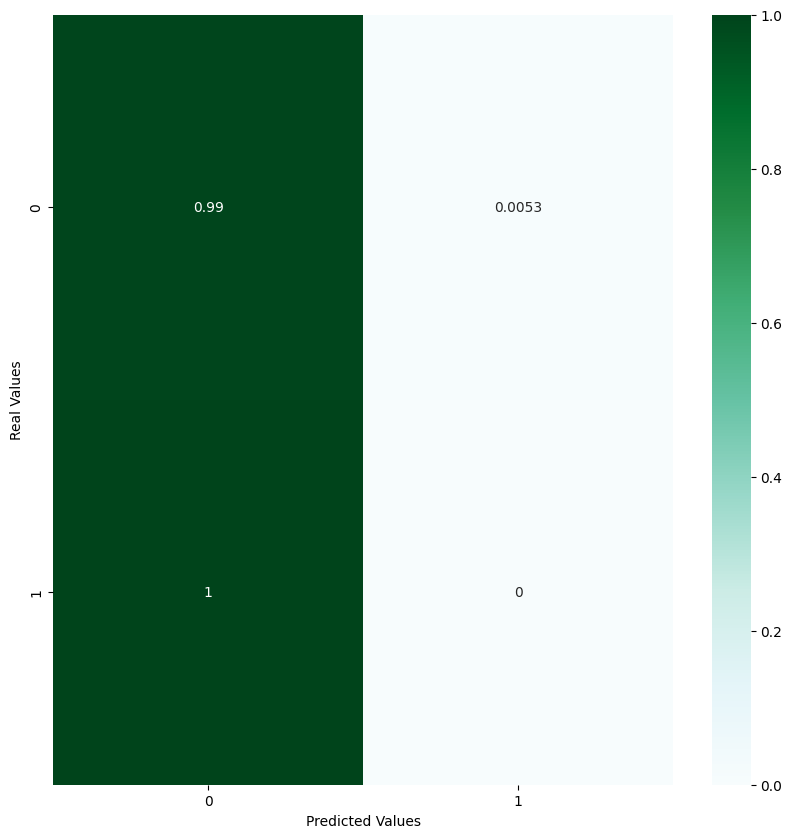

[[0.99469027 0.00530973]
 [1.         0.        ]]
Classification Report is: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.98       570



In [ ]:
find_best_model('rf')

## Logistic Regression

Total Time Required : 
 427.47716069221497
Best Estimator is : 

LogisticRegression(C=0.0001, random_state=42)
The Confusion Matrix is: 



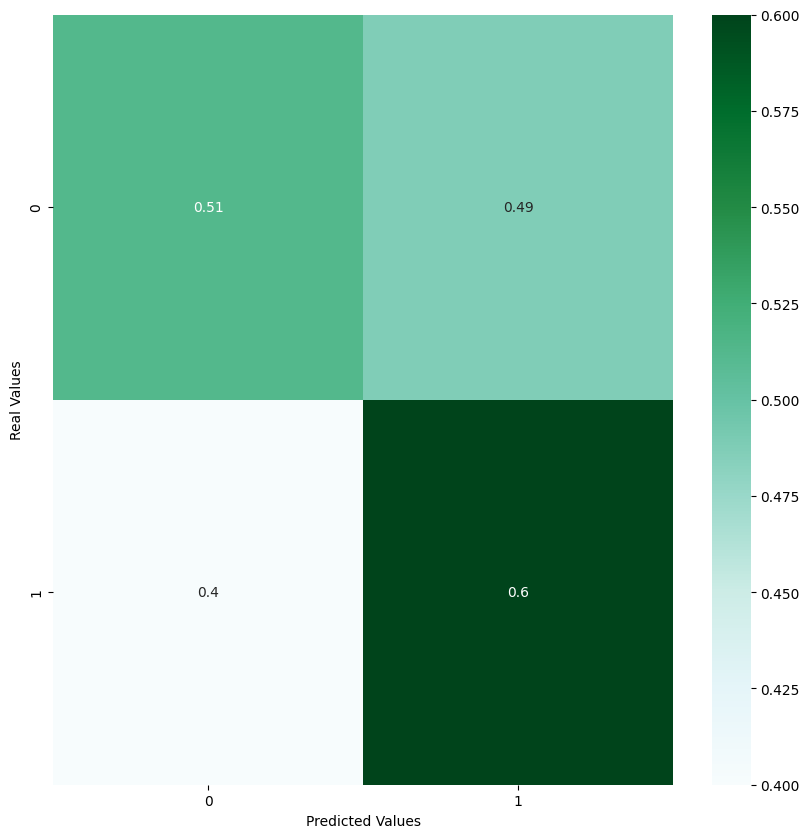

[[0.51327434 0.48672566]
 [0.4        0.6       ]]
Classification Report is: 

              precision    recall  f1-score   support

           0       0.99      0.51      0.68       565
           1       0.01      0.60      0.02         5

    accuracy                           0.51       570
   macro avg       0.50      0.56      0.35       570
weighted avg       0.98      0.51      0.67       570



In [ ]:
find_best_model('lr')

## K Nearest Neighbours

Total Time Required : 
 2349.1798183918
Best Estimator is : 

KNeighborsClassifier(n_neighbors=3, p=1)
The Confusion Matrix is: 



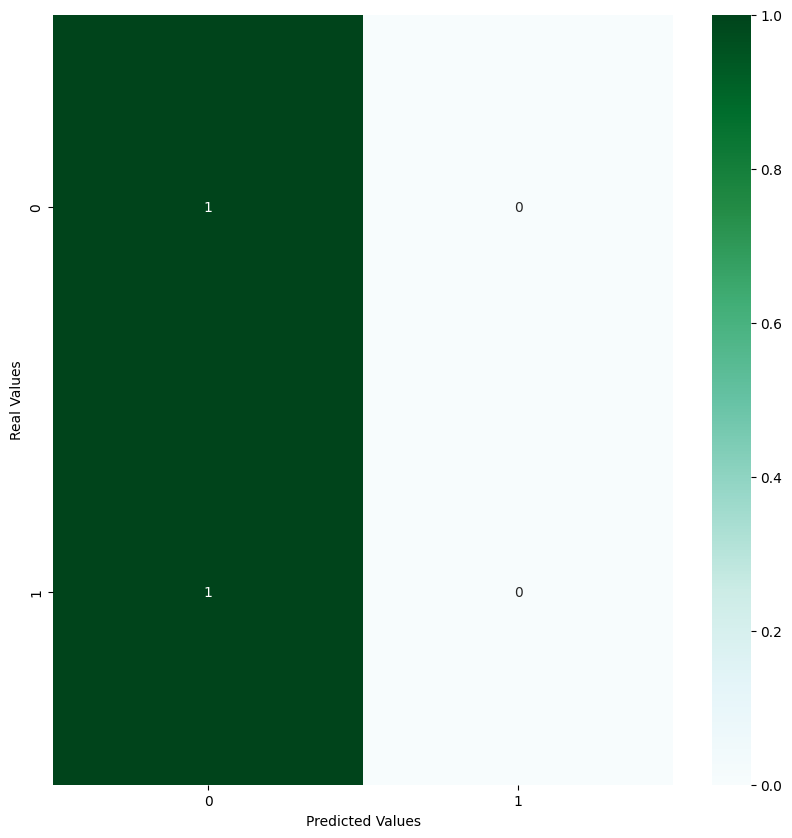

[[1. 0.]
 [1. 0.]]
Classification Report is: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



In [ ]:
find_best_model('knn')

## LIGHT GRADIENT BOOSTING

Total Time Required : 
 4089.4873757362366
Best Estimator is : 

LGBMClassifier(learning_rate=1, max_depth=6, random_state=42)
The Confusion Matrix is: 



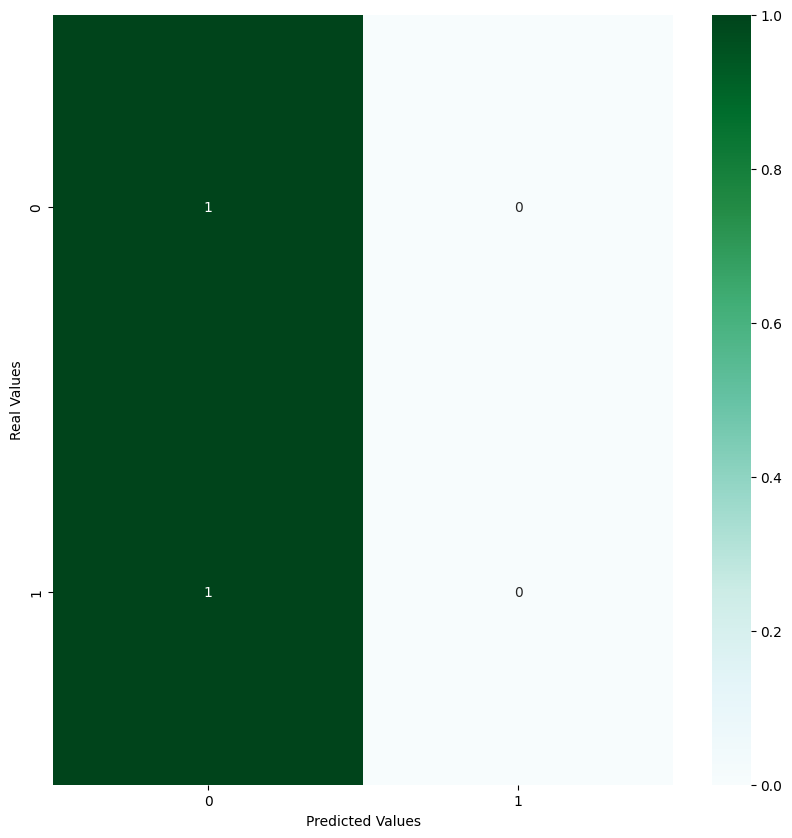

[[1. 0.]
 [1. 0.]]
Classification Report is: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



In [ ]:
find_best_model('lightgbm')

## Proposed CNN Model

In [28]:
def cnn_model():

    # Data preparation
    x_train, y_train, x_test, y_test = pre_processing()
    x_train, y_train = shuffle(x_train, y_train) # shuffle the data to avoid stagnant 0.0000e+00 val_accuracy


    n_features = x_train.shape[1]

    # Architecture
    model = keras.Sequential()
    model.add(layers.Reshape((3197, 1), input_shape=(3197,)))
    model.add(layers.Normalization())
    model.add(layers.Conv1D(filters=11, kernel_size=2, activation='relu', input_shape=(n_features, 1), kernel_regularizer='l2'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv1D(filters=7, kernel_size=2, activation='relu', input_shape=(n_features, 1), kernel_regularizer='l2'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(50, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(12, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    # Representation of architecture
    print(model.summary())

    # Compile model
    lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.8)

    model.compile(optimizer = Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=[metrics.Recall()])

    # Fit model
    early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(x_train, y_train, validation_split = 0.2, batch_size=64, callbacks=[early_stop], epochs=30, verbose=2)

    # Save the model
    model.save('/content/model/cnn_model.h5')
    print("CNN model saved to /content/model/cnn_model.h5")

    #Training Prediction
    print('Training Prediction:')
    y_class_pred = (model.predict(x_train) > 0.5).astype("int32")
    y_pred = model.predict(x_train)

    # Calculating the Confustion Matrix
    matrix = plot_confusion_matrix(y_train, y_class_pred)

    # Displaying the Output Predictions
    display_predictions(y_train, y_pred, y_class_pred, matrix)



    # Testing Predictions
    print('Testing Prediction:')
    y_class_pred = (model.predict(x_test) > 0.5).astype("int32")
    y_pred = model.predict(x_test)

    # Confustion matrix
    matrix = plot_confusion_matrix(y_test, y_class_pred)


    # Metrics
    display_predictions(y_test, y_pred, y_class_pred, matrix)

We do not get the best results in the first iteration, but are able to achieve it after multiple iterations.

In [ ]:
cnn_model()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 3197, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_1 (Normalization) │ (None, 3197, 1)        │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3196, 11)       │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3196, 11)       │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 3195, 7)        │           161 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3195, 7)        │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1597, 7)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1597, 7)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 11179)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │       559,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561,184 (2.14 MB)

 Trainable params: 561,145 (2.14 MB)

 Non-trainable params: 39 (160.00 B)

None
Epoch 1/30
127/127 - 35s - 279ms/step - loss: 1.4183 - recall_1: 0.6031 - val_loss: 1.2056 - val_recall_1: 0.0680
Epoch 2/30
127/127 - 37s - 294ms/step - loss: 0.4099 - recall_1: 0.7881 - val_loss: 0.5918 - val_recall_1: 0.4956
Epoch 3/30
127/127 - 29s - 229ms/step - loss: 0.3556 - recall_1: 0.8687 - val_loss: 0.7681 - val_recall_1: 1.0000
Epoch 4/30
127/127 - 29s - 229ms/step - loss: 0.2240 - recall_1: 0.9341 - val_loss: 0.6642 - val_recall_1: 1.0000
Epoch 5/30
127/127 - 43s - 339ms/step - loss: 0.2520 - recall_1: 0.9294 - val_loss: 4.2633 - val_recall_1: 0.1137
Epoch 6/30
127/127 - 37s - 291ms/step - loss: 0.2735 - recall_1: 0.9130 - val_loss: 0.4607 - val_recall_1: 0.5209
Epoch 7/30
127/127 - 42s - 327ms/step - loss: 0.1855 - recall_1: 0.9470 - val_loss: 1.2609 - val_recall_1: 0.1020
Epoch 8/30
127/127 - 28s - 224ms/step - loss: 0.1523 - recall_1: 0.9582 - val_loss: 0.6472 - val_recall_1: 1.0000
Epoch 9/30
127/127 - 28s - 219ms/step - loss: 0.1652 - recall_1: 0.9428 - val_loss:

CNN model saved to /content/model/cnn_model.h5
Training Prediction:
316/316 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step
